# Predicting Bike Rentals

[The link to dataset:](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

## Introduction to the Dataset:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- `instant`: record index
- `dteday` : date
- `season` : season (1:winter, 2:spring, 3:summer, 4:fall)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from [Web Link])
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

In [1]:
import pandas as pd
import numpy as np

bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
bike_rentals['Date'] = pd.to_datetime(bike_rentals['dteday'])

<function matplotlib.pyplot.show(*args, **kw)>

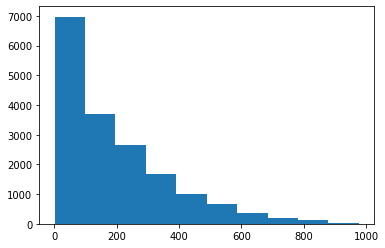

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(bike_rentals.cnt)
plt.show

In [5]:
#selecting the coloumn names which are numeric

num_cols = bike_rentals.select_dtypes(include=np.number).columns.tolist()
num_cols_f = num_cols.remove('cnt')

In [6]:
correlation = bike_rentals.corr()

correlation

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [7]:
#corr and sns heatmap automatically select the numerical values for us no need to drop the non numbers etc. 
sorted_corrs = correlation['cnt'].abs().sort_values()
sorted_corrs

weekday       0.026900
workingday    0.030284
holiday       0.030927
windspeed     0.093234
mnth          0.120638
weathersit    0.142426
season        0.178056
yr            0.250495
instant       0.278379
hum           0.322911
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

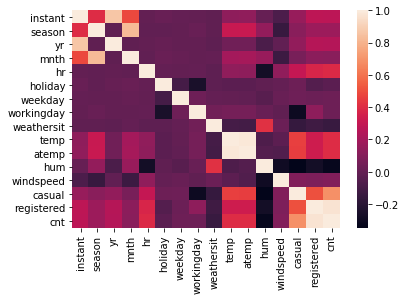

In [8]:
import seaborn as sns

sns.heatmap(correlation)

## Calculating Features

In [9]:
def assign_label(hour):
    if 6<=hour<12:
        return 1
    elif 12<=hour<18:
        return 2
    elif 18<=hour<=24:
        return 3
    elif 0<=hour<6:
        return 4
    
    
bike_rentals['time_label']=bike_rentals['hr'].apply(assign_label)
bike_rentals['time_label']

0        4
1        4
2        4
3        4
4        4
        ..
17374    3
17375    3
17376    3
17377    3
17378    3
Name: time_label, Length: 17379, dtype: int64

## Splitting the Data into Train and Test Sets

**Error Metric:** We use the Mean Squared Error metric (MSE)

In [10]:
bike_rentals['cnt'].value_counts()

5      260
6      236
4      231
3      224
2      208
      ... 
725      1
709      1
661      1
629      1
887      1
Name: cnt, Length: 869, dtype: int64

In [11]:
train = bike_rentals.sample(frac=.8) #adding a sample of 80% of the rows to the train set

train.shape

(13903, 19)

Select the rows that are in bike_rentals but not in train to be in the testing set. Assign the result to test.

This line generates a Boolean series that's False when a row in bike_rentals isn't found in train: `bike_rentals.index.isin(train.index)`

This line selects any rows in bike_rentals that aren't found in train to be in the testing set: `bike_rentals.loc[~bike_rentals.index.isin(train.index)]`


In [12]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test.shape

(3476, 19)

## Applying Linear Regression

In [13]:
#choosing the coloumns to use for linear regression 
remove_set = ['cnt','casual','registered','dteday','Date'] #columns to remove from features. 

#using sets we remove the column subset we don't want
features = list(set(bike_rentals.columns) - set(remove_set)) 

bike_rentals[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_label  17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   instant     17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   atemp       17379 non-null  float64
 5   hr          17379 non-null  int64  
 6   windspeed   17379 non-null  float64
 7   hum         17379 non-null  float64
 8   weekday     17379 non-null  int64  
 9   workingday  17379 non-null  int64  
 10  weathersit  17379 non-null  int64  
 11  mnth        17379 non-null  int64  
 12  temp        17379 non-null  float64
 13  season      17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[features], train['cnt'])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
predictions = lr.predict(test[features])

error = np.mean((predictions - test["cnt"]) ** 2)
error

17213.8871431995

### Thoughts on Error:
It is very high, but then again we are using linear regression with this. 

## Aplying Decision Trees

In [16]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(train[features], train['cnt'])

predictions = dtr.predict(test[features])

error = np.mean((predictions - test["cnt"]) ** 2)
error

2947.402761795167

Playing with various parameters of the decision tree regressor

In [17]:
dtr = DecisionTreeRegressor(random_state=0, min_samples_leaf = 5, min_samples_split = 5)

dtr.fit(train[features], train['cnt'])

predictions = dtr.predict(test[features])

error = np.mean((predictions - test["cnt"]) ** 2)
error

2424.8893494731237

We can reduce the error by choosing the appropriate parameters and giving them to the regressor. 

## Appying Random Forrests

In [18]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)

rfr.fit(train[features], train['cnt'])
predictions = rfr.predict(test[features])

error = np.mean((predictions - test["cnt"]) ** 2)
error

1589.6881403049513

We have made a significant imporvement in the error. 